# Table of Contents

<a class="anchor" id="top"></a>

** **

1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
    
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    
   2.1 [Incoherencies](#2.1-Incoherencies) <br><br>
    
3. [Data Cleaning & Preprocessing](#3.-Data-Cleaning-&-Preprocessing)

   3.1 [Duplicates](#3.1-Duplicates) <br>
    
   3.2 [Feature Engineering](#3.2-Feature-Engineering) <br>
   
   &emsp; 3.2.1 [Data Type Conversions](#3.2.1-Data-Type-Conversions) <br>
   
   &emsp; 3.2.2 [Encoding](#3.2.2-Encoding) <br>
   
   &emsp; 3.2.3 [Other Transformations](#3.2.3-Other-Transformations) <br>
    
   &emsp; 3.2.4 [Unique Feature-Pair Analysis](#3.2.4-Unique-Feature-Pair-Analysis) <br> 

   3.3 [Train-Test Split](#3.3-Train-Test-Split) <br>
   
   3.4 [Missing Values](#3.4-Missing-Values) <br>
    
   3.5 [Outliers](#3.5-Outliers) <br>

   3.6 [Visualisations](#3.6-Visualisations) <br><br>
   
4. [Feature Selection](#4.-Feature-Selection) 

    4.1 [Scaling](#4.1-Scaling) <br>
    
    4.2 [Filter Based Methods](#4.2-Filter-Based-Methods) <br>

    4.3 [Wrapper Methods](#4.3-Wrapper-Methods) <br>
    
    4.4 [Embbeded Methods](#4.4-Embbeded-Methods) <br>
    
    4.5 [Hybrid Methods](#4.5-Hybrid-Methods) <br><br>
    
5. [Test](#5.-Test) <br>

    5.1 [Feature Engineering](#5.1-Feature-Engineering) <br>
    
    &emsp; 5.1.1 [Data Type Conversions](#5.1.1-Data-Type-Conversions) <br>
   
    &emsp; 5.1.2 [Encoding](#5.1.2-Encoding) <br>
   
    &emsp; 5.1.3 [Other Transformations](#5.1.3-Other-Transformations) <br>
     
    &emsp; 5.1.4 [Unique Feature-Pair Analysis](#5.1.4-Unique-Feature-Pair-Analysis) <br> 
    
    5.2 [Missing Values](#5.2-Missing-Values) <br>
    
    5.3 [Log Transformation](#5.3-Log-Transformation) <br><br>

    
6. [Export](#6.-Export)


# 1. Importing Libraries & Data

In [111]:
import pandas as pd
import numpy as np

# profile report
#from ydata_profiling import ProfileReport

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
import visualisations as v

# Preprocessing 
import preproc as p

# Train test split
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler, \
        MinMaxScaler, RobustScaler

# Feature Selection
from sklearn.feature_selection import VarianceThreshold
import feature_selection as fs
## models for RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# label encoder
#from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

# import play_song as song

import warnings
warnings.filterwarnings("ignore")

**Import Data**

In [112]:
df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')
test = pd.read_csv('./project_data/test_data.csv', index_col = 'Claim Identifier')
df.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


# 2. Exploratory Data Analysis

<a href="#top">Top &#129033;</a>

In [113]:
df.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


In [115]:
df.shape

(593471, 32)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

**Correlation matrix**

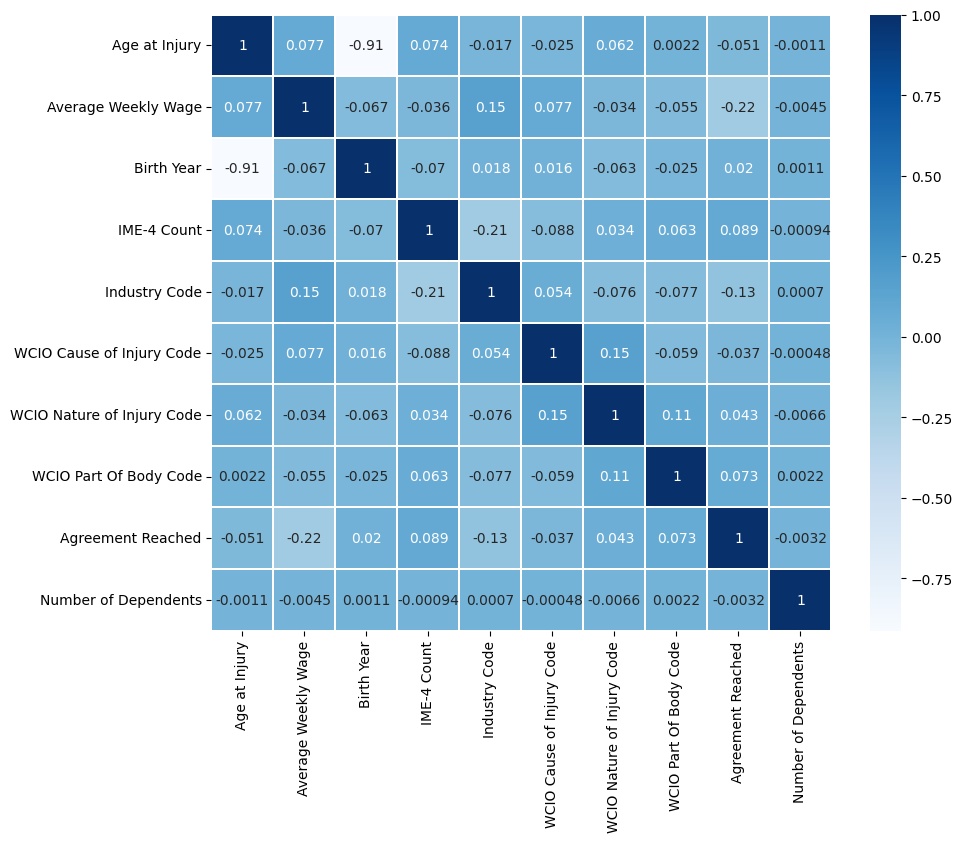

In [117]:
# drop column always missing
temp = df.drop('OIICS Nature of Injury Description', axis = 1)

# drop na
temp = temp.dropna()

# select numbers
corr_data = temp.select_dtypes(include=['number'])

correlation_matrix = corr_data.corr(method='spearman') # pearson by default

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.1)
plt.show()

**Unique Values**

In [118]:
for column in df.columns:
    
    if df[column].nunique() < 20:
        
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(df[column].nunique(), '\n')

Unique values in 'Alternative Dispute Resolution': ['N' nan 'Y' 'U']
3 

Unique values in 'Attorney/Representative': ['N' 'Y' nan]
2 

Unique values in 'Carrier Type': ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
8 

Unique values in 'Claim Injury Type': ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']
8 

Unique values in 'COVID-19 Indicator': ['N' nan 'Y']
2 

Unique values in 'District Name': ['SYRACUSE' 'ROCHESTER' 'ALBANY' nan 'HAUPPAUGE' 'NYC' 'BUFFALO'
 'BINGHAMTON' 'STATEWIDE']
8 

Unique values in 'Gender': ['M' 'F' nan 'U' 'X']
4 

Unique values in 'Medical Fee Region': ['I' 'II' nan 'IV' 'UK' 'III']
5 

Unique values in 'OIICS Nature of Injury Description': [nan]
0 

Unique values in 'Agreement Reached': [ 0.  1. nan]
2 

Unique values in 'WCB Decision': ['

## 2.1 Incoherencies

<a href="#top">Top &#129033;</a>

**Age at Injury**

very high max values

In [119]:
df[df['Age at Injury'] < 18]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393971,2019-06-26,0.0,N,2020-01-02,N,0.0,0.0,NaN,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11801,0.0,Not Work Related,1.0
5394788,2019-12-23,16.0,N,2020-01-02,N,0.0,2003.0,2020-01-02,NaN,PENNSYLVANIA MANUFACTURERS',1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,NaN,32.0,ON ICE OR SNOW,40.0,LACERATION,14.0,EYE(S),11776,0.0,Not Work Related,4.0
5394093,2019-12-28,0.0,N,2020-01-02,N,0.0,0.0,2019-12-30,NaN,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,NaN,55.0,HOLDING OR CARRYING,52.0,STRAIN OR TEAR,61.0,ABDOMEN INCLUDING GROIN,NaN,0.0,Not Work Related,5.0
5394068,NaN,0.0,N,2020-01-02,Y,0.0,1959.0,NaN,2019-12-23,STARR INDEMNITY & LIABILITY CO,1A. PRIVATE,2. NON-COMP,BRONX,N,NYC,NaN,M,NaN,23.0,CONSTRUCTION,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Not Work Related,6.0
5393794,NaN,0.0,N,2020-01-02,Y,0.0,1984.0,NaN,2019-12-27,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaN,F,NaN,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13212,0.0,Not Work Related,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164933,NaN,0.0,N,2022-12-30,Y,0.0,1972.0,2023-01-20,2022-12-22,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,KINGS,N,NYC,NaN,M,NaN,23.0,CONSTRUCTION,IV,NaN,60.0,"STRAIN OR INJURY BY, NOC",78.0,CARPAL TUNNEL SYNDROME,39.0,WRIST (S) & HAND(S),11221,0.0,Not Work Related,6.0
6164795,2022-08-20,17.0,N,2022-12-30,N,0.0,2005.0,2022-12-30,NaN,SEQUOIA INSURANCE COMPANY,1A. PRIVATE,3. MED ONLY,SCHOHARIE,N,BINGHAMTON,NaN,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,55.0,ANKLE,12149,0.0,Not Work Related,5.0
6164931,NaN,0.0,N,2022-12-30,Y,0.0,1957.0,NaN,2022-12-27,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,1. CANCELLED,KINGS,N,NYC,NaN,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11221,0.0,Not Work Related,0.0


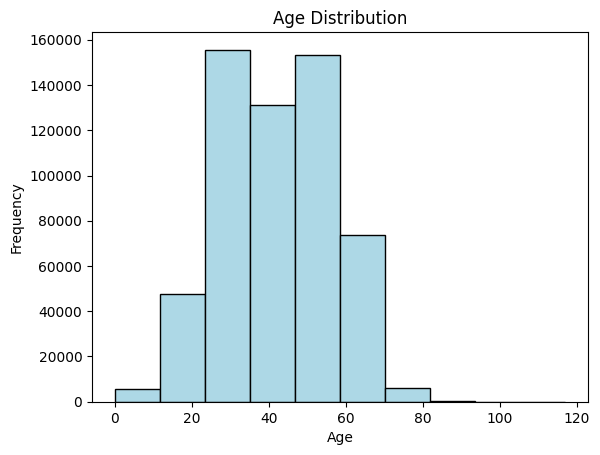

In [120]:
v.plot_histogram(df['Age at Injury'], 'Age', 'Frequency',
                'Age Distribution')

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Delete Ages
</div>


In [121]:
df = df.loc[(df['Age at Injury'] >= 18) & (df['Age at Injury'] <= 80) | (df['Age at Injury'].isna())]

# 7k rows < 18 & 700 rows > 80

**Birth Year**

very Low values for Birth Year, but a LOT of rows with the same issue

In [122]:
df[df['Birth Year'] < 1800]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394187,2019-12-14,21.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,51.0,INFORMATION,UK,NaN,75.0,FALLING OR FLYING OBJECT,37.0,INFLAMMATION,53.0,KNEE,07649,0.0,Not Work Related,3.0
5394053,2019-12-18,53.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,WARREN,N,ALBANY,NaN,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,5.0,STEAM OR HOT FLUIDS,4.0,BURN,56.0,FOOT,12810,0.0,Not Work Related,4.0
5393827,2019-12-26,21.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,III,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",40.0,LACERATION,36.0,FINGER(S),11941,0.0,Not Work Related,3.0
5393885,2019-12-12,57.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,NATIONAL CASUALTY CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,NaN,32.0,ON ICE OR SNOW,28.0,FRACTURE,44.0,CHEST,13646,0.0,Not Work Related,2.0
5394008,2019-12-17,42.0,N,2020-01-01,N,0.0,0.0,2019-12-31,2020-04-16,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),NaN,0.0,Not Work Related,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164729,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,2022-12-27,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,BRONX,N,STATEWIDE,2023-05-19,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,-9.0,MULTIPLE,44405,0.0,Not Work Related,6.0
6165113,2022-12-26,22.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,53.0,KNEE,94603,0.0,Not Work Related,3.0
6165672,2022-12-28,31.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,UNKNOWN,N,NYC,NaN,M,NaN,42.0,WHOLESALE TRADE,UK,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,41.0,UPPER BACK AREA,05743,0.0,Not Work Related,1.0


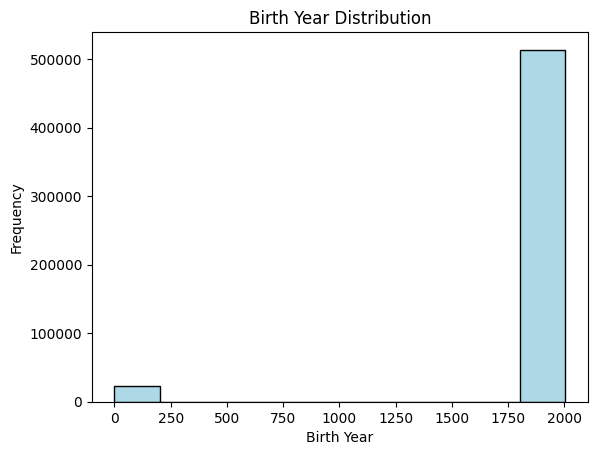

In [123]:
v.plot_histogram(df['Birth Year'], 'Birth Year', 'Frequency',
                'Birth Year Distribution')

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Low Birth Year
</div>


In [124]:
df = df.loc[(df['Birth Year'] > 0) | (df['Birth Year'].isna())]

**IME-4 Count**

Very High 

In [125]:
df[df['IME-4 Count'] > 18]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5395531,2019-12-26,51.0,N,2020-01-03,Y,1205.08,1968.0,2020-01-03,2020-01-17,A I U INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-09-30,M,36.0,42.0,WHOLESALE TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,21.0,VERTEBRAE,11434,0.0,Not Work Related,4.0
5395225,2019-12-30,49.0,N,2020-01-03,Y,935.22,1970.0,2020-01-03,NaN,ALLMERICA FINANCIAL BENEFIT,1A. PRIVATE,4. TEMPORARY,BRONX,N,NYC,2021-09-01,M,20.0,72.0,ACCOMMODATION AND FOOD SERVICES,IV,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,53.0,KNEE,10461,0.0,Not Work Related,2.0
5395560,2019-12-24,55.0,N,2020-01-03,Y,979.45,NaN,2020-01-03,2020-01-19,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,QUEENS,N,NYC,2020-03-30,F,19.0,53.0,REAL ESTATE AND RENTAL AND LEASING,IV,NaN,33.0,ON STAIRS,10.0,CONTUSION,19.0,FACIAL BONES,11434,0.0,Not Work Related,3.0
5396573,2019-12-19,47.0,N,2020-01-06,Y,670.00,1972.0,2020-01-04,2020-01-21,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WESTCHESTER,N,STATEWIDE,2020-05-01,M,27.0,52.0,FINANCE AND INSURANCE,III,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,16.0,DISLOCATION,22.0,DISC,10704,0.0,Not Work Related,3.0
5397093,2019-12-03,30.0,N,2020-01-07,Y,635.85,NaN,2020-01-07,2020-06-11,CHARTER OAK FIRE INS CO,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,2020-08-28,M,20.0,45.0,RETAIL TRADE,III,NaN,26.0,FROM LADDER OR SCAFFOLDING,16.0,DISLOCATION,43.0,DISC,10940,0.0,Not Work Related,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6041994,2022-07-11,50.0,N,2022-07-21,Y,2035.50,1971.0,2022-07-21,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,5. PPD SCH LOSS,QUEENS,N,NYC,2023-03-30,F,20.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,52.0,STRAIN OR TEAR,53.0,KNEE,11420,0.0,Not Work Related,2.0
6052392,2022-07-21,46.0,N,2022-08-03,Y,583.20,1975.0,2022-08-03,2022-07-28,NEW JERSEY MANUFACTURERS,1A. PRIVATE,4. TEMPORARY,KINGS,N,NYC,2023-03-17,F,21.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,48.0,VEHICLE UPSET,10.0,CONTUSION,65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11233,0.0,Not Work Related,2.0
6060261,2022-07-25,59.0,N,2022-08-13,Y,1372.06,1962.0,2022-08-23,2022-08-10,GREAT AMERICAN ALLIANCE INS CO,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2022-11-21,F,19.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,-9.0,MULTIPLE,11412,1.0,Not Work Related,5.0


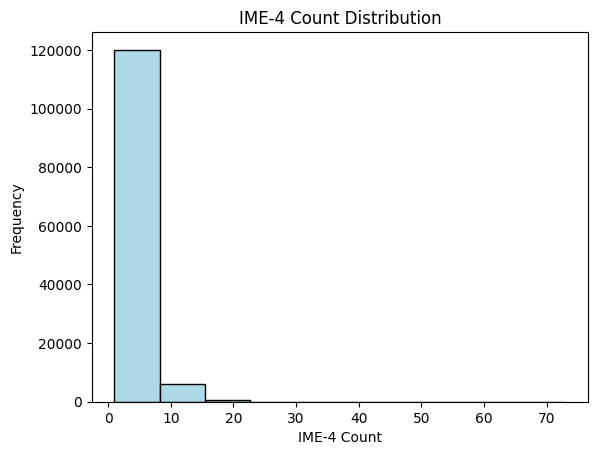

In [126]:
v.plot_histogram(df['IME-4 Count'], 'IME-4 Count', 'Frequency',
                'IME-4 Count Distribution')

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Delete IME-4 Count > 18
</div>


In [127]:
df = df.loc[(df['IME-4 Count'] <= 18) | (df['IME-4 Count'].isna())]

**OIICS Nature of Injury Description**

always missing

In [128]:
print(f"Number of missing rows in variable OIICS Nature of Injury Description: {len(df[df['OIICS Nature of Injury Description'].isna()])}")
print(f"Number of Rows in the Dataset: {len(df)}")

Number of missing rows in variable OIICS Nature of Injury Description: 561745
Number of Rows in the Dataset: 561745


**Zip Code**

In [129]:
df[df['Zip Code'].notna() & 
    df['Zip Code'].apply(lambda x: not str(x).isnumeric())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5488667,2019-07-13,29.0,N,2020-05-27,N,0.0,1990.0,2020-05-27,NaN,TRI-STATE INSURANCE COMPANY,1A. PRIVATE,1. CANCELLED,NEW YORK,N,NYC,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,52.0,UPPER LEG,M3K2B,0.0,Not Work Related,6.0
5496519,2020-02-12,20.0,N,2020-06-10,N,0.0,NaN,2020-06-10,NaN,TRI-STATE INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,52.0,UPPER LEG,M3K2B,0.0,Not Work Related,2.0
5502949,2020-05-28,48.0,N,2020-06-22,N,0.0,NaN,2020-06-22,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,NASSAU,N,NYC,NaN,F,NaN,42.0,WHOLESALE TRADE,UK,NaN,29.0,ON SAME LEVEL,10.0,CONTUSION,34.0,WRIST,V6Z3G,0.0,Not Work Related,3.0
5512171,2019-10-06,29.0,N,2020-07-07,N,0.0,1989.0,2020-07-07,NaN,TRI-STATE INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,52.0,UPPER LEG,M3K2B,0.0,Not Work Related,1.0
5562682,2020-07-13,31.0,N,2020-09-21,N,0.0,1988.0,2020-09-19,NaN,TRI-STATE INS CO OF MINNESOTA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,54.0,LOWER LEG,M3K2B,0.0,Not Work Related,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6119366,2022-09-13,22.0,N,2022-10-27,N,0.0,2000.0,2022-10-27,NaN,TRI-STATE INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,53.0,KNEE,M3K2C,0.0,Not Work Related,0.0
6127382,2022-09-30,25.0,N,2022-11-07,N,0.0,NaN,2022-11-05,NaN,TRI-STATE INS CO OF MINNESOTA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",49.0,SPRAIN OR TEAR,36.0,FINGER(S),H1V3S,0.0,Not Work Related,1.0
6127479,2022-10-01,23.0,N,2022-11-07,N,0.0,1999.0,2022-11-05,NaN,TRI-STATE INS CO OF MINNESOTA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,53.0,KNEE,H1V3S,0.0,Not Work Related,2.0


**Agreement Reached**

w/ a lot of zeros

In [130]:
df['Agreement Reached'].value_counts()

Agreement Reached
0.0    517820
1.0     24480
Name: count, dtype: int64

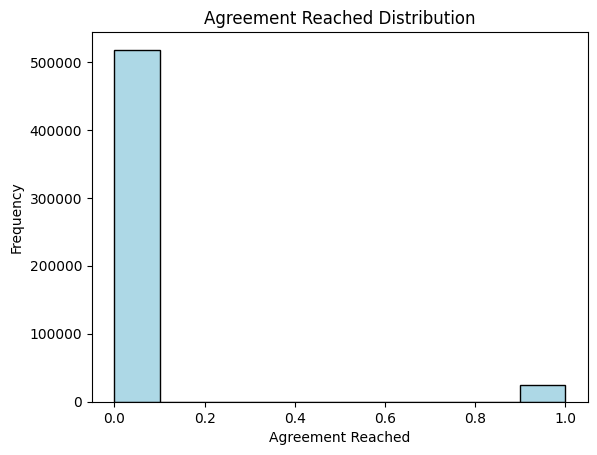

In [131]:
v.plot_histogram(df['Agreement Reached'], 'Agreement Reached', 'Frequency',
                'Agreement Reached Distribution')

**WCB Decision**

always the same

In [132]:
df['WCB Decision'].unique()

array(['Not Work Related', nan], dtype=object)

**Claim Injury Type**

imbalanced target 

In [133]:
df['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        273731
4. TEMPORARY       141663
3. MED ONLY         65917
5. PPD SCH LOSS     46366
1. CANCELLED        10135
6. PPD NSL           3999
8. DEATH              399
7. PTD                 90
Name: count, dtype: int64

**Incoherent Columns**

Some columns exist in train data but not on test

In [134]:
train_columns = set(df.columns)
test_columns = set(test.columns)

not_in_train = train_columns - test_columns
print(f'Columns in train but not in test: {not_in_train}')


Columns in train but not in test: {'WCB Decision', 'Agreement Reached', 'Claim Injury Type'}


# 3. Data Cleaning & Preprocessing

<a href="#top">Top &#129033;</a>

In [135]:
df

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165075,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.1 Duplicates

<a href="#top">Top &#129033;</a>

In [136]:
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
363651794,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209507552,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970865999,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807753247,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395971406,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365870975,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
duplicates = df.duplicated(keep=False)

non_missing_in_other_columns = df.drop(columns=['Assembly Date']).notna().any(axis=1)


df[duplicates & non_missing_in_other_columns]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [138]:
df = df.drop_duplicates()

verify the success

In [139]:
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 3.2 Feature Engineering

<a href="#top">Top &#129033;</a>

all transformations must be applied o X_test too

### 3.2.1 Data Type Conversions

even though this is usually feature engineering, it will be useful doing before treating missing values

In [140]:
#df.info()

In [141]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], 
                                     errors='coerce')

df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], 
                                     errors='coerce')

df['C-2 Date'] = pd.to_datetime(df['C-2 Date'], 
                                errors='coerce')

df['C-3 Date'] = pd.to_datetime(df['C-3 Date'], 
                                errors='coerce')

df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'], 
                                          errors='coerce')

In [142]:
df.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0


### 3.2.2 Encoding

<a href="#top">Top &#129033;</a>

**Alternative Dispute Resolution**

encode ['N' nan 'Y' 'U'] n -> 0, y -> 1, u -> 2

In [143]:
# freq = df['Alternative Dispute Resolution'].value_counts()
# freq

In [144]:
# df['Alternative Dispute Resolution'] = df['Alternative Dispute Resolution'].map(freq)

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Different Encoding
</div>


In [145]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['N', 'Y', 'U']])

In [149]:
df['Alternative Dispute Resolution'] = encoder.fit_transform(df[['Alternative Dispute Resolution']])

**Attorney/Representative**

['N' 'Y' nan] encode 0/1

In [150]:
df['Attorney/Representative'].value_counts()

Attorney/Representative
N    371886
Y    170414
Name: count, dtype: int64

In [151]:
df['Attorney/Representative'] = df['Attorney/Representative'].replace({'N': 0, 'Y': 1})

**Carrier Name**

In [152]:
df['Carrier Name'].nunique()

2012

frequency encoder

In [153]:
freq = df['Carrier Name'].value_counts()

In [154]:
df['Carrier Name'] = df['Carrier Name'].map(freq)

**Carrier Type**

encode (8 unique values)

In [155]:
freq = df['Carrier Type'].value_counts()
freq

Carrier Type
1A. PRIVATE                                    267627
3A. SELF PUBLIC                                116432
2A. SIF                                        105552
4A. SELF PRIVATE                                50280
UNKNOWN                                          1494
5D. SPECIAL FUND - UNKNOWN                        910
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         3
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          2
Name: count, dtype: int64

In [156]:
df['Carrier Type'] = df['Carrier Type'].map(freq)

**County of Injury**

probably too many to encode (?) --> freq encoding

In [157]:
df['County of Injury'].nunique()

63

In [158]:
freq = df['County of Injury'].value_counts()

In [159]:
df['County of Injury'] = df['County of Injury'].map(freq)

**COVID-19 Indicator**

binary encoding

In [160]:
df['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    515995
Y     26305
Name: count, dtype: int64

In [161]:
df['COVID-19 Indicator'] = df['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

**District Name**

encode (8 uniques)

In [162]:
freq = df['District Name'].value_counts()
freq

District Name
NYC           256223
ALBANY         80774
HAUPPAUGE      58185
BUFFALO        43130
SYRACUSE       42221
ROCHESTER      38422
BINGHAMTON     19750
STATEWIDE       3595
Name: count, dtype: int64

In [163]:
df['District Name'] = df['District Name'].map(freq)

**Gender**

encode ['M' 'F' nan 'U' 'X']

In [165]:
df['Gender'].value_counts()

Gender
M    315791
F    222124
U      4343
X        42
Name: count, dtype: int64

In [166]:
df['Gender'] = df['Gender'].map({
    'M': 0,  # Male
    'F': 1,  # Female
    'U': 2,  # Unknown 
    'X': 2   # Other 
})

**Medical Fee Region**

encode

In [167]:
freq = df['Medical Fee Region'].value_counts()
freq

Medical Fee Region
IV     261253
I      128340
II      83179
III     51975
UK      17553
Name: count, dtype: int64

In [168]:
df['Medical Fee Region'] = df['Medical Fee Region'].map(freq)

### 3.2.3 Other Transformations

<a href="#top">Top &#129033;</a>

**Accident Date**

transform into year (maybe month and day too)

In [169]:
df['Accident Year'] = df['Accident Date'].dt.year
df['Accident Month'] = df['Accident Date'].dt.month
df['Accident Day'] = df['Accident Date'].dt.day

**Assembly Date**

transform into year (maybe month and day too)

In [170]:
df['Assembly Year'] = df['Assembly Date'].dt.year
df['Assembly Month'] = df['Assembly Date'].dt.month
df['Assembly Day'] = df['Assembly Date'].dt.day

**C-2 Date**

transform into year (maybe month and day too)

In [171]:
df['C-2 Year'] = df['C-2 Date'].dt.year
df['C-2 Month'] = df['C-2 Date'].dt.month
df['C-2 Day'] = df['C-2 Date'].dt.day

**Zip Code**

transform non-numeric into missing values

In [172]:
df['Zip Code'] = df['Zip Code'].apply(lambda x: np.nan 
                                      if not str(x).isnumeric() else x)

**Columns not in test data**

In [173]:
df = df.drop(['Agreement Reached', 'WCB Decision'], axis = 1)

**Drop Transformed Columns**

In [174]:
df = df.drop(['Accident Date', 'Assembly Date', 'C-2 Date'], axis = 1)

### 3.2.4 Unique Feature-Pair Analysis 

<a href="#top">Top &#129033;</a>

save codes and descriptions in dataframes, for later consultation (if needed)

In [175]:
injury_cause = df[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()

injury_cause_df = injury_cause.set_index('WCIO Cause of Injury Code')

injury_cause_df.head(2)

,WCIO Cause of Injury Description
WCIO Cause of Injury Code,
27.0,FROM LIQUID OR GREASE SPILLS
97.0,REPETITIVE MOTION


In [176]:
injury_nature = df[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()

injury_nature_df = injury_nature.set_index('WCIO Nature of Injury Code')

injury_nature_df.head(2)

,WCIO Nature of Injury Description
WCIO Nature of Injury Code,
10.0,CONTUSION
49.0,SPRAIN OR TEAR


In [177]:
body_code = df[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

body_code_df = body_code.set_index('WCIO Part Of Body Code')


body_code_df.head(2)

,WCIO Part Of Body Description
WCIO Part Of Body Code,
62.0,BUTTOCKS
38.0,SHOULDER(S)


In [178]:
industry_code = df[['Industry Code', 'Industry Code Description']].drop_duplicates()

industry_code_df = industry_code.set_index('Industry Code')


industry_code_df.head(2)

,Industry Code Description
Industry Code,
44.0,RETAIL TRADE
23.0,CONSTRUCTION


Dropping columns from df

In [179]:
df = df.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
              'WCIO Part Of Body Description', 'Industry Code Description'], axis = 1)

## 3.3 Train-Test Split

<a href="#top">Top &#129033;</a>

**Claim Injury Type**

Address missing values in target variable before split

In [147]:
df[df['Claim Injury Type'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
957648180,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653337074,NaT,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489154817,NaT,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351928125,NaT,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454184427,NaT,NaN,NaN,2020-01-05,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894683610,NaT,NaN,NaN,2022-12-27,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820269517,NaT,NaN,NaN,2022-12-28,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815542773,NaT,NaN,NaN,2022-12-29,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dropping them

In [148]:
df.dropna(subset=['Claim Injury Type'], inplace=True)

After dropping the missing values we can encode

In [180]:
label_mapping = {
    "1. CANCELLED": 1,
    "2. NON-COMP": 2,
    "3. MED ONLY": 3,
    "4. TEMPORARY": 4,
    "5. PPD SCH LOSS": 5,
    "6. PPD NSL": 6,
    "7. PTD": 7,
    "8. DEATH": 8
}

df['Claim Injury Type'] = df['Claim Injury Type'].replace(label_mapping)

**Holdout Method**

In [181]:
X, y = df.drop('Claim Injury Type', axis=1), df['Claim Injury Type'] 

In [182]:
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify = y)


## 3.4 Missing Values

<a href="#top">Top &#129033;</a>

In [183]:
X_train.isna().sum()

Age at Injury                              0
Alternative Dispute Resolution             0
Attorney/Representative                    0
Average Weekly Wage                    21537
Birth Year                             22923
C-3 Date                              293428
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    320174
Gender                                     0
IME-4 Count                           332421
Industry Code                           6340
Medical Fee Region                         0
OIICS Nature of Injury Description    433840
WCIO Cause of Injury Code               9877
WCIO Nature of Injury Code              9887
WCIO Part Of Body Code                 10731
Zip Code                               33170
Number of Dependents                       0
Accident Y

**Accident Year, Month, Day**

need to fill before birth year otherwise error

In [184]:
accident_med = {
    'Accident Year': X_train['Accident Year'].median(),
    'Accident Month': X_train['Accident Month'].median(),
    'Accident Day': X_train['Accident Day'].median()
}

In [185]:
X_train['Accident Year'].fillna(accident_med['Accident Year'], inplace=True)
X_train['Accident Month'].fillna(accident_med['Accident Month'], inplace=True)
X_train['Accident Day'].fillna(accident_med['Accident Day'], inplace=True)

In [186]:
X_val['Accident Year'].fillna(accident_med['Accident Year'], inplace=True)
X_val['Accident Month'].fillna(accident_med['Accident Month'], inplace=True)
X_val['Accident Day'].fillna(accident_med['Accident Day'], inplace=True)

**Birth Year**

In [187]:
# Mask for X_train where 'Birth Year' is missing or 0 and other columns are not missing
train_mask = X_train['Accident Year'].notna() & X_train['Age at Injury'].notna() & \
           (X_train['Birth Year'].isna() | (X_train['Birth Year'] == 0))

# Apply the imputation to X_val based on 'Accident Year' and 'Age at Injury'
X_train.loc[train_mask, 'Birth Year'] = X_train['Accident Year'] - X_train['Age at Injury']


In [188]:
val_mask = X_val['Accident Year'].notna() & X_val['Age at Injury'].notna() & \
           (X_val['Birth Year'].isna() | (X_val['Birth Year'] == 0))

X_val.loc[val_mask, 'Birth Year'] = X_val['Accident Year'] - X_val['Age at Injury']

**C-3 Date**

In [189]:
print(f'There are {len(X_train[X_train["C-3 Date"].isna()])} rows with missing values')
#X_train[X_train['C-3 Date'].isna()].head(2)

There are 293428 rows with missing values


In [190]:
# Create a binary variable: 1 if 'C-3 Date' is not missing, 0 if it is missing
X_train['C-3 Date Binary'] = X_train['C-3 Date'].notna().astype(int)

In [191]:
X_val['C-3 Date Binary'] = X_val['C-3 Date'].notna().astype(int)

**First Hearing Date**

In [192]:
print(f'There are {len(X_train[X_train["First Hearing Date"].isna()])} rows with missing values')
#X_train[X_train['First Hearing Date'].isna()].head(2)

There are 320174 rows with missing values


In [193]:
# Create a new variable: 0 if 'First Hearing Date' is missing, otherwise extract the year
X_train['First Hearing Year'] = X_train['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

In [194]:
X_val['First Hearing Year'] = X_val['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

**IME-4 Count**

In [195]:
print(f'There are {len(X_train[X_train["IME-4 Count"].isna()])} rows with missing values')
#X_train[X_train['IME-4 Count'].isna()].head(2)

There are 332421 rows with missing values


In [196]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)

In [197]:
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)

**OIICS Nature of Injury Description**

In [198]:
print(f'There are {len(X_train[X_train["OIICS Nature of Injury Description"].isna()])} rows with missing values')
#X_train[X_train['OIICS Nature of Injury Description'].isna()].head(2)

There are 433840 rows with missing values


In [199]:
# size of missing / size of dataset
len(X_train[X_train['OIICS Nature of Injury Description'].isna()]) / len(X_train)

1.0

Drop replaced and not needed variables

In [200]:
X_train = X_train.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

In [201]:
X_val = X_val.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

**Code Variables** 

(Except zip code)

In [202]:
columns_to_fill = ['WCIO Cause of Injury Code', 
                   'WCIO Nature of Injury Code', 
                   'WCIO Part Of Body Code', 
                   'Industry Code']

In [203]:
X_train[columns_to_fill] = X_train[columns_to_fill].fillna(0)

In [204]:
X_val[columns_to_fill] = X_val[columns_to_fill].fillna(0)

**Zip Code**

In [205]:
X_train['Zip Code'] = X_train['Zip Code'].fillna(99999)

In [206]:
X_val['Zip Code'] = X_val['Zip Code'].fillna(99999)

**C-2 Year, Month, Day**

In [207]:
c2_med = {
    'C-2 Year': X_train['C-2 Year'].median(),
    'C-2 Month': X_train['C-2 Month'].median(),
    'C-2 Day': X_train['C-2 Day'].median()
}

In [208]:
X_train['C-2 Year'].fillna(c2_med['C-2 Year'], inplace=True)
X_train['C-2 Month'].fillna(c2_med['C-2 Month'], inplace=True)
X_train['C-2 Day'].fillna(c2_med['C-2 Day'], inplace=True)

In [209]:
X_val['C-2 Year'].fillna(c2_med['C-2 Year'], inplace=True)
X_val['C-2 Month'].fillna(c2_med['C-2 Month'], inplace=True)
X_val['C-2 Day'].fillna(c2_med['C-2 Day'], inplace=True)

**Average Weekly Wage**

In [210]:
X_train['Average Weekly Wage'] = p.ball_tree_impute(X_train, 'Average Weekly Wage', n_neighbors=5)

In [211]:
X_val['Average Weekly Wage'] = p.ball_tree_impute(X_val, 'Average Weekly Wage', n_neighbors=5)

**Verify the success**

In [212]:
print('X_train \n')
print(X_train.isna().sum())
print('\nX_val \n')
print(X_val.isna().sum())

X_train 

Age at Injury                     0
Alternative Dispute Resolution    0
Attorney/Representative           0
Average Weekly Wage               0
Birth Year                        0
Carrier Name                      0
Carrier Type                      0
County of Injury                  0
COVID-19 Indicator                0
District Name                     0
Gender                            0
IME-4 Count                       0
Industry Code                     0
Medical Fee Region                0
WCIO Cause of Injury Code         0
WCIO Nature of Injury Code        0
WCIO Part Of Body Code            0
Zip Code                          0
Number of Dependents              0
Accident Year                     0
Accident Month                    0
Accident Day                      0
Assembly Year                     0
Assembly Month                    0
Assembly Day                      0
C-2 Year                          0
C-2 Month                         0
C-2 Day           

## 3.5 Outliers

<a href="#top">Top &#129033;</a>

In [ ]:
v.boxplots(X_train.loc[:, X_train.columns])

In [ ]:
for column in X_train.columns:
        if pd.api.types.is_numeric_dtype(X_train[column]):
            v.plot_histogram(X_train[column], 
                           xlabel=column, 
                           ylabel='Frequency', 
                           title=f'Histogram of {column}', 
                           color='lightblue')

**Interquartile Range**

In [213]:
p.detect_outliers_iqr(X_train, missing_threshold = 10)

Column: Age at Injury - Number of Outliers: 0
Column: Age at Injury - % of Outliers: 0.0% 

Column: Alternative Dispute Resolution - Number of Outliers: 1922
Column: Alternative Dispute Resolution - % of Outliers: 0.44302046837543796% 

Column: Attorney/Representative - Number of Outliers: 0
Column: Attorney/Representative - % of Outliers: 0.0% 

Column: Average Weekly Wage - Number of Outliers: 16766
Column: Average Weekly Wage - % of Outliers: 3.864558362529965% 

Column: Birth Year - Number of Outliers: 19
Column: Birth Year - % of Outliers: 0.004379494744606307% 

Column: Carrier Name - Number of Outliers: 84239
Column: Carrier Name - % of Outliers: 19.417066199520562% 

Column: Carrier Type - Number of Outliers: 0
Column: Carrier Type - % of Outliers: 0.0% 

Column: County of Injury - Number of Outliers: 0
Column: County of Injury - % of Outliers: 0.0% 

Column: COVID-19 Indicator - Number of Outliers: 21101
Column: COVID-19 Indicator - % of Outliers: 4.863774663470403% 

Column: 

In [ ]:
columns = ['Carrier Name', 'IME-4 Count', 'Industry Code', 'WCIO Part Of Body Code']

v.boxplot_out(X_train, columns = columns, ncols = 2)

Doesnt make sense to apply log to some of the `Code`columns and not to other. Try to apply log on `Carrier Name`and `IME-4 Count`.

In [214]:
#X_train['Carrier Name Log'] = np.log(X_train['Carrier Name'] + 1)
X_train['IME-4 Count Log'] = np.log(X_train['IME-4 Count'] + 1)

In [215]:
#X_val['Carrier Name Log'] = np.log(X_val['Carrier Name'] + 1)
X_val['IME-4 Count Log'] = np.log(X_val['IME-4 Count'] + 1)

In [ ]:
columns = ['Carrier Name Log', 'IME-4 Count Log']

v.boxplot_out(X_train, columns = columns, ncols = 2)

still show outliers. keep both and choose in feature selection 

## 3.6 Visualisations

<a href="#top">Top &#129033;</a>

In [ ]:
all_train = pd.concat([X_train, y_train], axis=1)
all_train.head(2)

In [ ]:
accident_counts = all_train['Accident Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(accident_counts.index, accident_counts.values)
plt.title('Number of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.xticks()
plt.grid(True)
plt.show()

In [ ]:
# Set up the figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First subplot: Accident Month
sns.countplot(data=all_train, x='Accident Month', ax=axes[0])
axes[0].set_title('Accident Count by Month')
axes[0].set_xlabel('Accident Month')
axes[0].set_ylabel('Count')

# Second subplot: Assembly Month
sns.countplot(data=all_train, x='Assembly Month', ax=axes[1])
axes[1].set_title('Assembly Count by Month')
axes[1].set_xlabel('Assembly Month')
axes[1].set_ylabel('Count')

# Third subplot: C-2 Month
sns.countplot(data=all_train, x='C-2 Month', ax=axes[2])
axes[2].set_title('C-2 Count by Month')
axes[2].set_xlabel('C-2 Month')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age at Injury', y='Average Weekly Wage', data=all_train, scatter_kws={'alpha':0.5})

# Set the labels and title
plt.title('Age at Injury vs Average Weekly Wage')
plt.xlabel('Age at Injury')
plt.ylabel('Average Weekly Wage')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='Gender', y='Average Weekly Wage')
plt.title('Gender vs. Average Weekly Wage')
plt.xlabel('Gender')
plt.ylabel('Average Weekly Wage')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='Carrier Type', y='Age at Injury')
plt.title('Carrier Type vs. Age at Injury')
plt.xlabel('Carrier Type')
plt.ylabel('Age at Injury')
plt.xticks(rotation=30) 
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxenplot(x="Claim Injury Type", y="Average Weekly Wage", data=df)
plt.title("Distribution of Weekly Wages by Claim Injury Type")
plt.show()

In [ ]:
df["Claim Injury Type"].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title("Proportion of Claim Injury Types")
plt.xlabel("Claim Injury Type")
plt.ylabel("Proportion")
plt.show()

# 4. Feature Selection

<a href="#top">Top &#129033;</a>

**Split Numerical and Categorical Variables**

In [216]:
num = ['Age at Injury', 'Average Weekly Wage', 'Birth Year','IME-4 Count', 'Number of Dependents',
       'Accident Year', 'Accident Month', 'Accident Day', 'Assembly Year', 'Assembly Month', 'Assembly Day',
       'C-2 Year', 'C-2 Month', 'C-2 Day', 'First Hearing Year', 'IME-4 Count Log']

# 
#, 'Carrier Name Log'

categ = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name',
         'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
         'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
         'WCIO Part Of Body Code', 'Zip Code', 'C-3 Date Binary' ]

## 4.1 Scaling

<a href="#top">Top &#129033;</a>

**Standard Scaler**

In [ ]:
standard = StandardScaler()
X_train_SS = standard.fit_transform(X_train[num])
X_train_SS = pd.DataFrame(X_train_SS, columns=num, index=X_train.index)

In [ ]:
X_train_SS.describe()

**MinMax Scaler**

In [ ]:
minmax = MinMaxScaler()
X_train_MM = minmax.fit_transform(X_train[num])
X_train_MM = pd.DataFrame(X_train_MM, columns=num, index=X_train.index)

In [ ]:
X_train_MM.describe()

**Robust Scaler**

In [217]:
robust = RobustScaler()
X_train_RS = robust.fit_transform(X_train[num])
X_train_RS = pd.DataFrame(X_train_RS, columns=num, index=X_train.index)

In [ ]:
X_train_RS.describe()

### Summary of Scaling Methods for Numerical Data

#### 1. **RobustScaler**
- **Ideal for handling outliers**: The **RobustScaler** is best when working with data that contains outliers, as it scales based on the interquartile range (IQR), making it less sensitive to extreme values.
- **Example**: Features like **'IME-4 Count'** have large outliers that could distort the scaling. **RobustScaler** mitigates this issue.

#### 2. **StandardScaler**
- **Works well for normally distributed data**: The **StandardScaler** standardizes data by centering it with a mean of zero and scaling it by the standard deviation. It is effective when our data is normally distributed.
- **Example**: The feature **'Birth Year'** has a normal distribution and is well-centered using this scaler.

#### 3. **MinMaxScaler**
- **Sensitive to outliers**: The **MinMaxScaler** compresses data into a 0–1 range, but is vulnerable to outliers, which can significantly skew the result. It's most effective when applied to features with moderate ranges or when the model is sensitive to the feature range.
- **Example**: The **'Industry Code'** feature, with a moderate range, benefits from this transformation.

---

### Scaling Results Summary:

| Feature | **RobustScaler** | **StandardScaler** | **MinMaxScaler** |
|---------|------------------|--------------------|------------------|
| **Age at Injury** | Median-based scaling to handle outliers | Scaled to have mean = 0, std = 1 | Values between 0 and 1 |
| **Average Weekly Wage** | Robust to large outliers | Scaled but affected by outliers | Most values compressed due to extreme values |
| **Birth Year** | Handles skew in birth year data | Centered around mean | No major issues |
| **IME-4 Count** | Effective for highly skewed counts | Still influenced by outliers | Compression due to large counts |
| **Industry Code** | Efficient scaling due to moderate range | Normalized for centered values | All values mapped to 0–1 range |

---

### Recommendation:
Given that our dataset contains outliers in variables like **'IME-4 Count'** and **'Average Weekly Wage'**, the **RobustScaler** is the best choice for this scenario, in our opinion. It effectively handles skewed data without the influence of outliers. However, if we require data centering for algorithms that depend on normalized features, we can also consider using the **StandardScaler** after addressing outliers.


## 4.2 Filter-Based Methods

<a href="#top">Top &#129033;</a>

**Variance Threshold**

In [ ]:
X_train_RS.var()

In [ ]:
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)

X_train_high_variance = selector.fit_transform(X_train_RS)
print(f"Number of features before variance threshold: {X_train_RS.shape[1]}")

print(f"Number of features after variance threshold: {X_train_high_variance.shape[1]}")


**Spearman Correlation Matrix**

In [ ]:
fs.correlation_matrix(X_train_RS, num)

**High Correlations**

| Var 1 | Var 2 | Correlation |
| ----- | ----- | ----------- |
| Birth Year | Age at Injury | 0.95 |
| C-2 Month | Assembly Month | 0.93 |
| IME-4 Count | IME-4 Count Log | 0.92|
| C-2 Day | Assembly Day | 0.82 |


**Chi Squared Test**

In [ ]:
fs.chi_squared(X_train, y_train, categ)

**Not Selected Features**

| Var | Chi2 Score | P-value |
| ----- | ----- | ----------- |
| Alternative Dispute Resolution | 8.856989 | 0.263087 |
| Zip Code | 7.118438 | 0.416653 |


## 4.3 Wrapper Methods

<a href="#top">Top &#129033;</a>

In [ ]:
#len(X_train[num].columns)

**RFE**

In [ ]:
n_features = np.arange(5, 17)
model = LogisticRegression()
fs.rfe(X_train_RS, y_train, n_features = n_features, model = model)

# ~45 min to run

**RFE LR Features**

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'IME-4 Count Log',
 'Accident Year',
 'Accident Month',
 'Assembly Year',
 'Assembly Month',
 'Assembly Day',
 'C-2 Year',
 'C-2 Month',
 'C-2 Day',
 'First Hearing Year']

In [ ]:
n_features = np.arange(5, 17)
model = RandomForestClassifier()
fs.rfe(X_train_RS, y_train, n_features = n_features, model = model)

# ~4h to run

**RFE with Cross Validation**

In [ ]:
# experiment with RFECV

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold

def rfe_cv(X, y, model=None, cv = 5):
    
    best_score = 0
    best_features = []

    results = {}
    
    for feature in n_features:
        
        # Perform RFE to select features
        rfe_cv = RFECV(estimator=model, step=1, cv=StratifiedKFold(cv), scoring='f1_macro')
    
        rfe_cv.fit(X, y)

        # Get selected features
        selected_features = X.columns[rfe_cv.support_]
        
        # Model predictions and classification report on the training set with selected features
        y_pred = rfe_cv.predict(X)
        print(f"Classification Report for {feature} features:\n")
        print(classification_report(y, y_pred))
        
        # Calculate the macro average F1 score
        macro_f1 = f1_score(y, y_pred, average='macro')
        print(f"Macro Avg F1 Score for {feature} features: {macro_f1:.4f}\n")
        
        # Store the results
        results[feature] = selected_features
        
        # Check if this is the best score
        if macro_f1 > best_score:
            best_score = macro_f1
            best_features = selected_features.tolist()  
    
    return best_features


In [ ]:
model = LogisticRegression()
cv = 5
rfe_cv(X_train_RS, y_train,
       model = model, cv = cv)

## 4.4 Embedded Methods

<a href="#top">Top &#129033;</a>

**Lasso**

In [ ]:
fs.lasso(X_train_RS, y_train, alpha = 0.01)

**Extra Trees Classifier**

In [ ]:
fs.plot_feature_importance(X_train_RS, X_train[categ], y_train, 
                        n_estimators = 250)

## 4.5 Hybrid Methods

<a href="#top">Top &#129033;</a>

**Boruta**

In [ ]:
from boruta import BorutaPy

In [ ]:
def boruta(X_num, X_categ, y, n_estimators=250, 
                                      random_state=42, threshold=5):
    
    # Concatenate scaled and categorical features
    X_comb = pd.concat([X_num, X_categ], axis=1)

    # Define and fit Boruta with RandomForest
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    boruta_selector = BorutaPy(rf_model, n_estimators='auto', random_state=random_state)
    boruta_selector.fit(X_comb.values, y.values)

    # Get selected features based on Boruta selection
    selected_features = X_comb.columns[boruta_selector.support_].tolist()
    print("Selected features:", selected_features)

    # Retrieve feature importances from the Boruta results
    feature_importance = rf_model.feature_importances_[boruta_selector.support_]
    feature_importance = 100.0 * (feature_importance / feature_importance.max())

    # Sort indices of features based on importance
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 0.5

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(selected_features)[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Feature Importance of Selected Features Using Boruta')
    
    # Draw a line at the importance threshold
    plt.axvline(x=threshold, color='red', linestyle='--', label=f'{threshold}% Importance Threshold')
    plt.legend()
    plt.show()

In [ ]:
boruta(X_train_RS, X_train[categ], y_train, 
                        n_estimators = 10)

In [ ]:
import play_song as song
song.play_('audio.mp3')

In [ ]:
# rfe_LR = ['Age at Injury',
#  'Average Weekly Wage',
#  'Birth Year',
#  'IME-4 Count',
#  'IME-4 Count Log',
#  'Accident Year',
#  'Accident Month',
#  'Assembly Year',
#  'Assembly Month',
#  'Assembly Day',
#  'C-2 Year',
#  'C-2 Month',
#  'C-2 Day',
#  'First Hearing Year']


# rfe_RF = ['Age at Injury',
#  'Average Weekly Wage',
#  'Birth Year',
#  'IME-4 Count',
#  'IME-4 Count Log',
#  'Number of Dependents',
#  'Accident Year',
#  'Accident Month',
#  'Accident Day',
#  'Assembly Year',
#  'Assembly Month',
#  'Assembly Day',
#  'C-2 Year',
#  'C-2 Month',
#  'C-2 Day',
#  'First Hearing Year']

**Final Decision**

`Numeric Variables`

| Variable                   | Variance | Correlation | RFE LR | RFE RF | Lasso | Extra Trees | `Decision` |
|----------------------------|----------|-------------|--------|--------|-------|-------------|------------|
| Accident Day               | keep     | keep | **discard**  | keep         | **discard** | keep       |-----  |
| Accident Month             | keep     | keep | keep         | keep         | **discard** | keep       |-----  |
| Accident Year              | keep     | keep | keep         | keep         | **discard** | keep       |-----  |
| Age at Injury              | keep     | ?    | keep         | keep         | keep        | keep       |-----  |
| Average Weekly Wage        | keep     | keep | keep         | keep         | keep        | keep       |-----  |
| Assembly Day               | keep     | ?    | keep         | keep         | **discard** | keep       |-----  |
| Assembly Month             | keep     | ?    | keep         | keep         | **discard** | keep       |-----  |
| Assembly Year              | keep     | keep | keep         | keep         | keep        | keep       |-----  |
| Birth Year                 | keep     | ?    | keep         | keep         | **discard** | keep       |-----  |
| C-2 Day                    | keep     | ?    | keep         | keep         | **discard** | keep       |-----  |
| C-2 Month                  | keep     | ?    | keep         | keep         | keep        | keep       |-----  |
| C-2 Year                   | keep     | keep | keep         | keep         | keep        | keep       |-----  |
| First Hearing Year         | keep     | keep | keep         | keep         | keep        | keep       |-----  |
| IME-4 Count                | keep     | ?    | keep         | keep         | keep        | keep       |-----  |
| IME-4 Count Log            | keep     | ?    | keep         | keep         | keep        | keep       |-----  |
| Number of Dependents       | keep     | keep | **discard**  | **discard**  | **discard** | keep       |-----  |

<br>

`Categorical Variables`

| Variable | Chi-Squared | Extra Trees | `Decision` |
| -------- | ----------- | ------------|------------|
| Alternative Dispute Resolution       | **discard** |**discard**|---------|
| Attorney/Representative              | keep        |keep       |---------|
| Carrier Name                         | keep        |keep       |---------|
| Carrier Name Log                     | keep        |keep       |---------|
| Carrier Type                         | keep        |keep       |---------|
| County of Injury                     | keep        |keep       |---------|
| COVID-19 Indicator                   | keep        |**discard**|---------|
| C-3 Date Binary                      | keep        |keep       |---------|
| District Name                        | keep        |keep       |---------|
| Gender                               | keep        |keep       |---------|
| Industry Code                        | keep        |keep       |---------|
| Medical Fee Region                   | keep        |keep       |---------|
| WCIO Cause of Injury Code            | keep        |keep       |---------|
| WCIO Nature of Injury Code           | keep        |keep       |---------|
| WCIO Part Of Body Code               | keep        |keep       |---------|
| Zip Code                             | **discard** |keep       |---------|

<br> 

`Final Features (Numeric & Categorical`

| Variable |
| -------- | 
| -------- | 
| -------- | 
| -------- | 

**Final Features**

In [218]:
final_num = ['Age at Injury', 'Average Weekly Wage', 'Assembly Year',
        'C-2 Month', 'C-2 Year', 'First Hearing Year', 'IME-4 Count Log']
#

discard1_num = ['Accident Month', 'Accident Year', 'Assembly Day',
                'Assembly Month', 'Birth Year', 'C-2 Day']

discard2_num = ['Accident Day']

discard3_num = ['Number of Dependents']

In [219]:
final_categ = ['Attorney/Representative', 'Carrier Name',
         'Carrier Type', 'County of Injury', 'District Name', 'Gender',
         'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
         'WCIO Part Of Body Code','C-3 Date Binary' ]
#, 'Carrier Name Log'

discard1_categ = ['COVID-19 Indicator', 'Zip Code']

discard2_categ = ['Alternative Dispute Resolution']

In [220]:
X_train = X_train[final_num + final_categ]
X_val = X_val[final_num + final_categ]

# 5. Test

<a href="#top">Top &#129033;</a>

In [ ]:
test.describe().T

In [ ]:
test.describe(include = 'object').T

## 5.1 Feature Engineering

<a href="#top">Top &#129033;</a>

### 5.1.1 Data Type Conversions

<a href="#top">Top &#129033;</a>

In [221]:
test['Accident Date'] = pd.to_datetime(test['Accident Date'], 
                                     errors='coerce')

test['Assembly Date'] = pd.to_datetime(test['Assembly Date'], 
                                     errors='coerce')

test['C-2 Date'] = pd.to_datetime(test['C-2 Date'], 
                                errors='coerce')

test['C-3 Date'] = pd.to_datetime(test['C-3 Date'], 
                                errors='coerce')

test['First Hearing Date'] = pd.to_datetime(test['First Hearing Date'], 
                                          errors='coerce')

### 5.1.2 Encoding

<a href="#top">Top &#129033;</a>

**Alternative Dispute Resolution**

encode ['N' nan 'Y' 'U'] n -> 0, y -> 1, u -> 2

In [ ]:
# freq = test['Alternative Dispute Resolution'].value_counts()
# freq

In [ ]:
# test['Alternative Dispute Resolution'] = test['Alternative Dispute Resolution'].map(freq)

<div style="background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; padding: 10px; border-radius: 5px;">
    <strong>Change Alert: </strong> Different Encoding
</div>


In [222]:
encoder = OrdinalEncoder(categories=[['N', 'Y', 'U']])

In [223]:
test['Alternative Dispute Resolution'] = encoder.fit_transform(test[['Alternative Dispute Resolution']])

**Attorney/Representative**

['N' 'Y' nan] encode 0/1

In [224]:
test['Attorney/Representative'].value_counts()

Attorney/Representative
N    306476
Y     81499
Name: count, dtype: int64

In [225]:
test['Attorney/Representative'] = test['Attorney/Representative'].replace({'N': 0, 'Y': 1})

**Carrier Name**

In [226]:
test['Carrier Name'].nunique()

1598

In [227]:
freq = test['Carrier Name'].value_counts()

In [228]:
test['Carrier Name'] = test['Carrier Name'].map(freq)

**Carrier Type**

encode (8 unique values)

In [229]:
freq = test['Carrier Type'].value_counts()
freq

Carrier Type
1A. PRIVATE                                    201827
3A. SELF PUBLIC                                 78948
2A. SIF                                         66189
4A. SELF PRIVATE                                38619
UNKNOWN                                          1642
5D. SPECIAL FUND - UNKNOWN                        748
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         2
Name: count, dtype: int64

In [230]:
test['Carrier Type'] = test['Carrier Type'].map(freq)

**County of Injury**

probably too many to encode (?) --> freq encoding

In [231]:
test['County of Injury'].nunique()

63

In [232]:
freq = test['County of Injury'].value_counts()

In [233]:
test['County of Injury'] = test['County of Injury'].map(freq)

**COVID-19 Indicator**

binary encoding

In [234]:
test['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    385434
Y      2541
Name: count, dtype: int64

In [235]:
test['COVID-19 Indicator'] = test['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

**District Name**

encode (8 uniques)

In [236]:
freq = test['District Name'].value_counts()
freq

District Name
NYC           187972
ALBANY         56500
HAUPPAUGE      36656
BUFFALO        31481
SYRACUSE       29537
ROCHESTER      28073
BINGHAMTON     15382
STATEWIDE       2374
Name: count, dtype: int64

In [237]:
test['District Name'] = test['District Name'].map(freq)

**Gender**

encode ['M' 'F' nan 'U' 'X']

In [238]:
test['Gender'].value_counts()

Gender
M    215343
F    167019
U      5340
X       273
Name: count, dtype: int64

In [239]:
test['Gender'] = test['Gender'].map({
    'M': 0,  # Male
    'F': 1,  # Female
    'U': 2,  # Unknown 
    'X': 2   # Other 
})

**Medical Fee Region**

encode

In [240]:
freq = test['Medical Fee Region'].value_counts()
freq

Medical Fee Region
IV     182276
I       91300
II      58743
III     34679
UK      20977
Name: count, dtype: int64

In [241]:
test['Medical Fee Region'] = test['Medical Fee Region'].map(freq)

### 5.1.3 Other Transformations

<a href="#top">Top &#129033;</a>

**Accident Date**

transform into year (maybe month and day too)

In [242]:
test['Accident Year'] = test['Accident Date'].dt.year
test['Accident Month'] = test['Accident Date'].dt.month
test['Accident Day'] = test['Accident Date'].dt.day

**Assembly Date**

transform into year (maybe month and day too)

In [243]:
test['Assembly Year'] = test['Assembly Date'].dt.year
test['Assembly Month'] = test['Assembly Date'].dt.month
test['Assembly Day'] = test['Assembly Date'].dt.day

**C-2 Date**

transform into year (maybe month and day too)

In [244]:
test['C-2 Year'] = test['C-2 Date'].dt.year
test['C-2 Month'] = test['C-2 Date'].dt.month
test['C-2 Day'] = test['C-2 Date'].dt.day

**Zip Code**

transform non-numeric into missing values

In [245]:
test['Zip Code'] = test['Zip Code'].apply(lambda x: np.nan 
                                      if not str(x).isnumeric() else x)

**Drop Transformed Columns**

In [246]:
test = test.drop(['Accident Date', 'Assembly Date', 'C-2 Date'], axis = 1)

### 5.1.4 Unique Feature-Pair Analysis 

<a href="#top">Top &#129033;</a>

save codes and descriptions in dataframes, for later consultation (if needed)

In [247]:
injury_cause = test[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()

injury_cause_test = injury_cause.set_index('WCIO Cause of Injury Code')

injury_cause_test.head(2)

,WCIO Cause of Injury Description
WCIO Cause of Injury Code,
31.0,"FALL, SLIP OR TRIP, NOC"
75.0,FALLING OR FLYING OBJECT


In [248]:
injury_nature = test[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()

injury_nature_test = injury_nature.set_index('WCIO Nature of Injury Code')

injury_nature_test.head(2)

,WCIO Nature of Injury Description
WCIO Nature of Injury Code,
10.0,CONTUSION
49.0,SPRAIN OR TEAR


In [249]:
body_code = test[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

body_code_test = body_code.set_index('WCIO Part Of Body Code')


body_code_test.head(2)

,WCIO Part Of Body Description
WCIO Part Of Body Code,
54.0,LOWER LEG
10.0,MULTIPLE HEAD INJURY


In [250]:
industry_code = test[['Industry Code', 'Industry Code Description']].drop_duplicates()

industry_code_test = industry_code.set_index('Industry Code')


industry_code_test.head(2)

,Industry Code Description
Industry Code,
48.0,TRANSPORTATION AND WAREHOUSING
45.0,RETAIL TRADE


Dropping columns from df

In [251]:
test = test.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
              'WCIO Part Of Body Description', 'Industry Code Description'], axis = 1)

## 5.2 Missing Values

<a href="#top">Top &#129033;</a>

In [252]:
test.isna().sum()

Age at Injury                              0
Alternative Dispute Resolution             0
Attorney/Representative                    0
Average Weekly Wage                    19204
Birth Year                             19470
C-3 Date                              302759
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    344947
Gender                                     0
IME-4 Count                           352726
Industry Code                           7736
Medical Fee Region                         0
OIICS Nature of Injury Description    387975
WCIO Cause of Injury Code              10348
WCIO Nature of Injury Code             10560
WCIO Part Of Body Code                  9549
Zip Code                               19623
Number of Dependents                       0
Accident Y

**Accident Year, Month, Day**

need to fill before birth year otherwise error

In [253]:
test['Accident Year'].fillna(accident_med['Accident Year'], inplace=True)
test['Accident Month'].fillna(accident_med['Accident Month'], inplace=True)
test['Accident Day'].fillna(accident_med['Accident Day'], inplace=True)

**Birth Year**

In [254]:
# Mask for X_val where 'Birth Year' is missing or 0 and other columns are not missing
test_mask = test['Accident Year'].notna() & test['Age at Injury'].notna() & \
           (test['Birth Year'].isna() | (test['Birth Year'] == 0))

# Apply the imputation to X_val based on 'Accident Year' and 'Age at Injury'
test.loc[test_mask, 'Birth Year'] = test['Accident Year'] - test['Age at Injury']


**C-3 Date**

In [255]:
print(f'There are {len(test[test["C-3 Date"].isna()])} rows with missing values')

There are 302759 rows with missing values


In [256]:
# Create a binary variable: 1 if 'C-3 Date' is not missing, 0 if it is missing
test['C-3 Date Binary'] = test['C-3 Date'].notna().astype(int)

**First Hearing Date**

In [257]:
print(f'There are {len(test[test["First Hearing Date"].isna()])} rows with missing values')

There are 344947 rows with missing values


In [258]:
# Create a new variable: 0 if 'First Hearing Date' is missing, otherwise extract the year
test['First Hearing Year'] = test['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

**IME-4 Count**

In [259]:
print(f'There are {len(test[test["IME-4 Count"].isna()])} rows with missing values')

There are 352726 rows with missing values


In [260]:
test['IME-4 Count'] = test['IME-4 Count'].fillna(0)

**OIICS Nature of Injury Description**

In [261]:
print(f'There are {len(test[test["OIICS Nature of Injury Description"].isna()])} rows with missing values')

There are 387975 rows with missing values


In [262]:
# size of missing / size of dataset
len(test[test['OIICS Nature of Injury Description'].isna()]) / len(test)

1.0

Drop replaced and not needed variables

In [263]:
test = test.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

**Code Variables** 

(Except zip code)

In [264]:
columns_to_fill = ['WCIO Cause of Injury Code', 
                   'WCIO Nature of Injury Code', 
                   'WCIO Part Of Body Code', 
                   'Industry Code']

In [265]:
test[columns_to_fill] = test[columns_to_fill].fillna(0)

**Zip Code**

In [266]:
test['Zip Code'] = test['Zip Code'].fillna(99999)

**C-2 Year, Month, Day**

In [267]:
test['C-2 Year'].fillna(c2_med['C-2 Year'], inplace=True)
test['C-2 Month'].fillna(c2_med['C-2 Month'], inplace=True)
test['C-2 Day'].fillna(c2_med['C-2 Day'], inplace=True)

**Average Weekly Wage**

In [268]:
test['Average Weekly Wage'] = p.ball_tree_impute(test, 'Average Weekly Wage', n_neighbors=5)

**Verify the success**

In [ ]:
test.isna().sum()

## 5.3 Log Transformation

<a href="#top">Top &#129033;</a>

In [269]:
#test['Carrier Name Log'] = np.log(test['Carrier Name'] + 1)
test['IME-4 Count Log'] = np.log(test['IME-4 Count'] + 1)

# 6. Export

<a href="#top">Top &#129033;</a>

In [270]:
test.to_csv('./project_data/test_treated.csv')

In [271]:
X_train.to_csv('./project_data/x_train.csv')
X_val.to_csv('./project_data/x_val.csv')
y_train.to_csv('./project_data/y_train.csv')
y_val.to_csv('./project_data/y_val.csv')